# Laptop-Price Prediction 

In [562]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import scipy.stats as stats

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df=pd.read_csv('laptop_data.csv')

In [3]:
df.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [9]:
#check for duplicate rows

df[df.duplicated()].shape

(29, 11)

In [10]:
#dropping duplicate rows

df.drop_duplicates(inplace=True,ignore_index=True)

In [11]:
df[df.duplicated()].shape

(0, 11)

In [65]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [6]:
cat_fea=[i for i in df.columns if df[i].dtype=='O']  
cat_fea

['Company',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight']

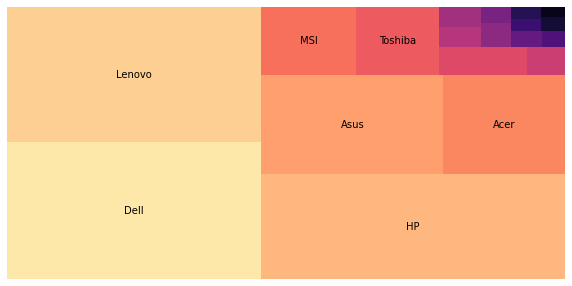

In [106]:
# Tree map representation of Laptop brands 

plt.figure(figsize=(10,5))

val=df['Company'].value_counts().values
ind=df['Company'].value_counts().index

squarify.plot(val,label=ind[0:7],color=sns.color_palette('magma_r',len(val)));  
plt.axis('off');

1. Most of the laptops in the dataset belongs to Lenove,Dell and HP

In [116]:
ind=df['TypeName'].value_counts().index

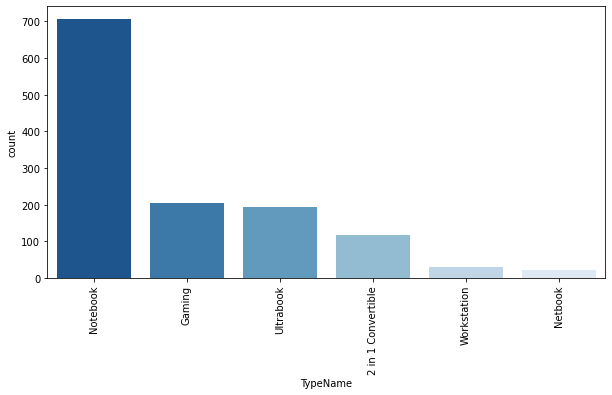

In [121]:
# Barchart Representation of Type of Laptops counts

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='TypeName',order=ind,palette=sns.color_palette('Blues_r',len(ind)))
plt.xticks(rotation=90);

1. Most of laptops in the dataset are of type "Notebooks" followed by "Gaming" and "ultra_notebook"

In [128]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [65]:
ind=df.ScreenResolution.value_counts(normalize=True).index
val=df.ScreenResolution.value_counts(normalize=True).values

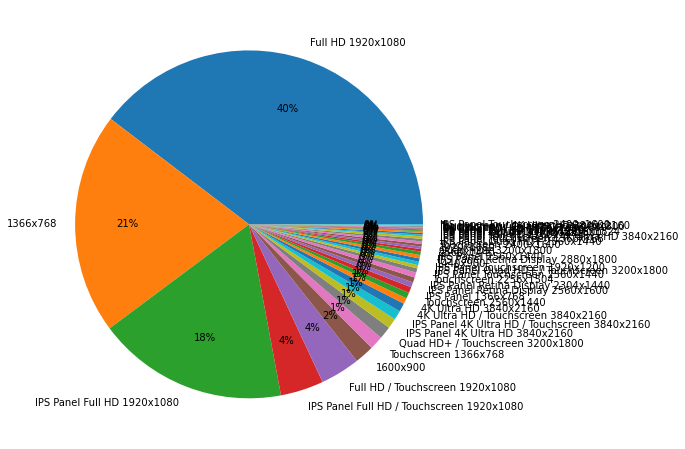

In [66]:
#Pie chart representation of ScreenResoltion  counts

plt.figure(figsize=(10,8))
plt.pie(x=val,labels=ind,autopct='%1.0f%%',pctdistance=0.7);

1. Most of the laptops belongs to the screenresolution "['Full HD 1920x1080',IPS Panel Full HD 1920x1080,1366x768]" .
2. Since the percentage values of other resolutions are comparatively small, we can combine them to form a single class as it will not effect much on prediction

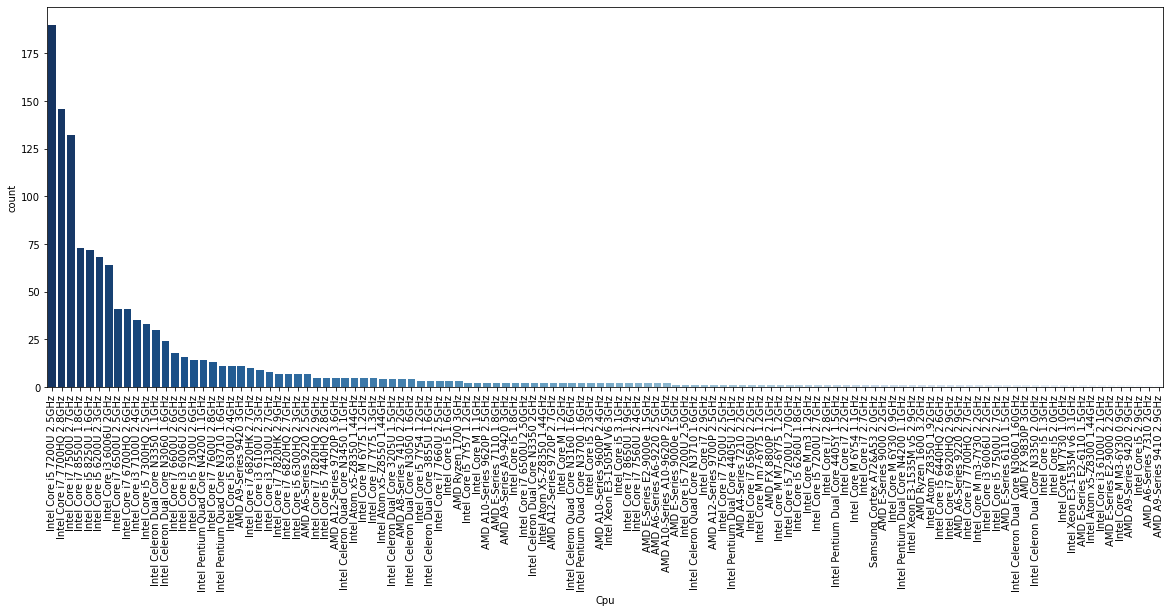

In [146]:
#Bar chart Representation of CPU' s counts

plt.figure(figsize=(20,7))
ind=df.Cpu.value_counts().index
sns.countplot(data=df,x='Cpu',order=ind,palette=sns.color_palette('Blues_r',len(ind)));
plt.xticks(rotation=90);

1. Most of the laptops processors in the dataset belongs to Intel.

2. We can see that each class of Cpu Category contains information about laptops processor,its manufacturer and the cpu frequecy. It will be better if we can seperate out these informations, so that  the model can  use these informations more effectively in
   predicting laptop prices

In [150]:
val=df.Ram.value_counts().values
ind=df.Ram.value_counts().index

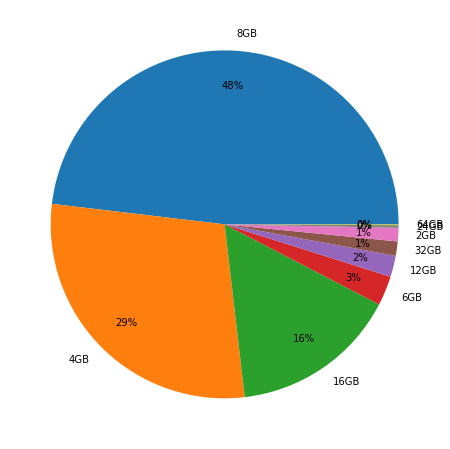

In [157]:
#Pie chart Representation of RAM counts

plt.figure(figsize=(8,8))
plt.pie(x=val,labels=ind,autopct='%1.0f%%',pctdistance=0.8);

1. Most of the laptops in the dataset belongs to 8Gb  followed by 4gb and 16 gb
2. Also need to convert ram values to numerical by removing GB from it.

In [13]:
#df.columns

In [12]:
#df.Memory.value_counts()

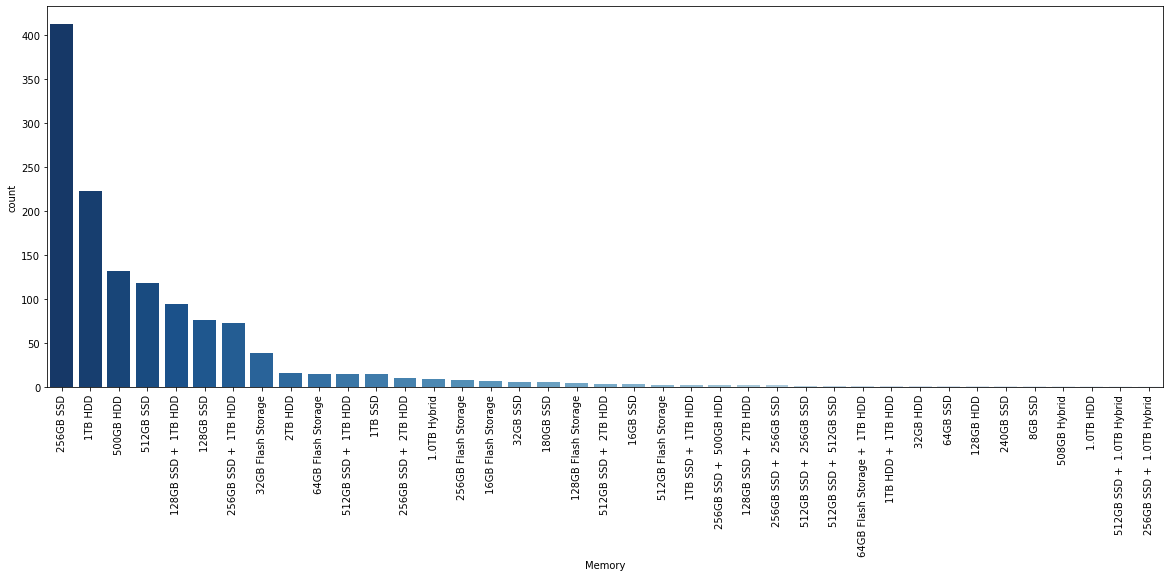

In [10]:
#Bar chart Representation of Memory counts

plt.figure(figsize=(20,7))
ind=df.Memory.value_counts().index
sns.countplot(data=df,x='Memory',order=ind,palette=sns.color_palette('Blues_r',len(ind)));
plt.xticks(rotation=90);

1. Altogether there are Four Types of Storages --SSD,HDD,Flash Storage and Hybrid
2. Need to extract storage size info to form  new numerical features consist of  above mentioned  storages

In [14]:
val=df.OpSys.value_counts().values
ind=df.OpSys.value_counts().index

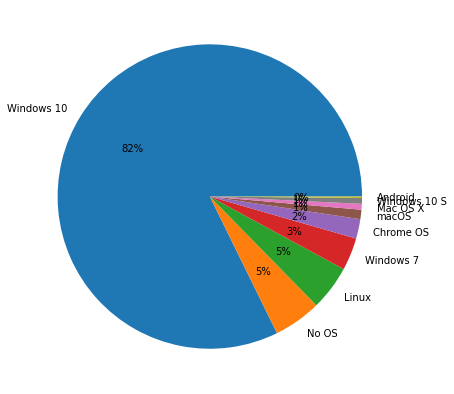

In [22]:
#Pie chart representation of count of diff types of Operating system in the dataset

plt.figure(figsize=(7,7))
plt.pie(x=val,labels=ind,autopct='%1.0f%%',pctdistance=0.6);

1. Most of the laptops in the dataset belongs to windows operating system forllowed by Linux,chrome os and Mac



In [24]:
## Need to combine differe windows version to single category

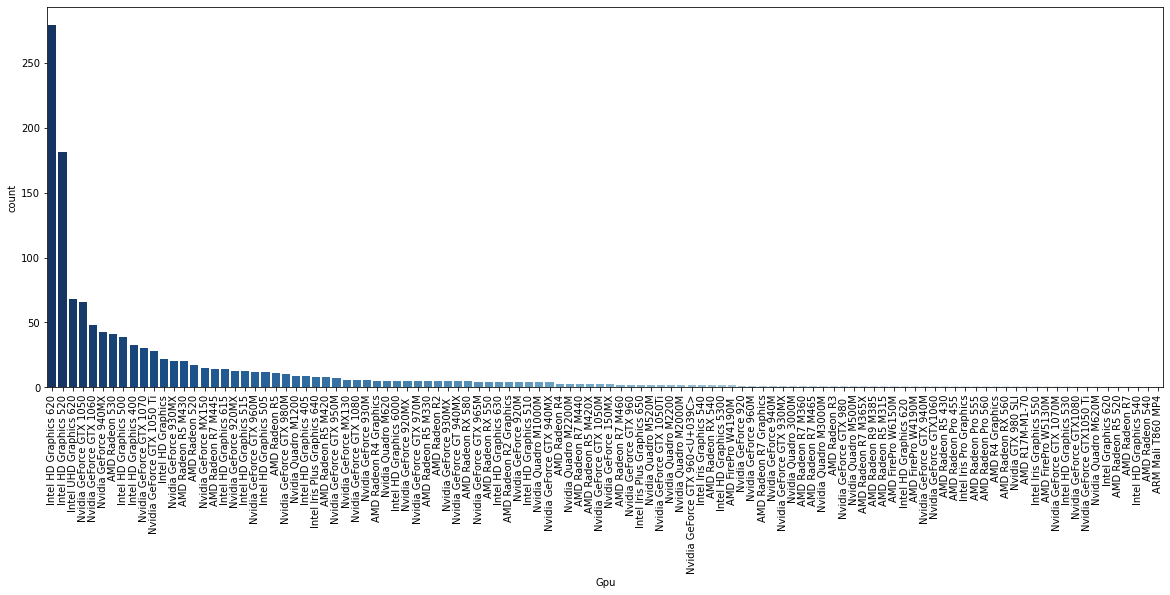

In [17]:
# Count plot representation of Gpu

plt.figure(figsize=(20,7))
ind=df.Gpu.value_counts().index
sns.countplot(data=df,x='Gpu',order=ind,palette=sns.color_palette('Blues_r',len(ind)));
plt.xticks(rotation=90);

In [16]:
df['Gpu'].apply(lambda x: x.split()[0]).value_counts()

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: Gpu, dtype: int64

1. Most of the Gpu belongs to Intel and Nvidia followed by AMD and ARM
2. Need to extract these data to a new feature

In [18]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


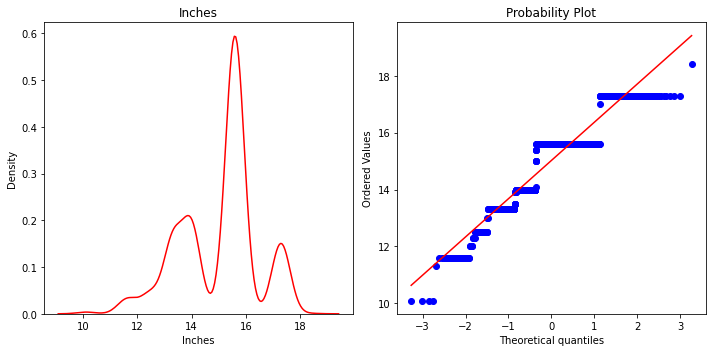

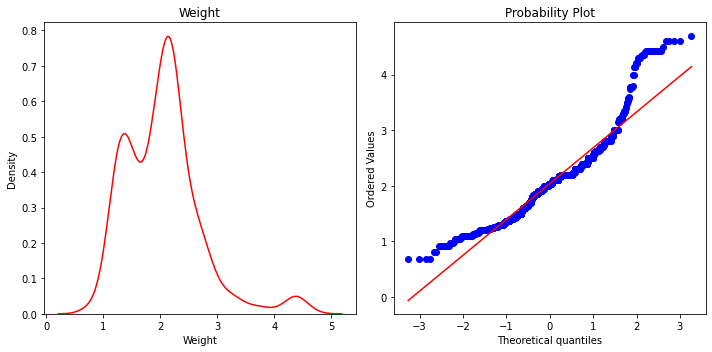

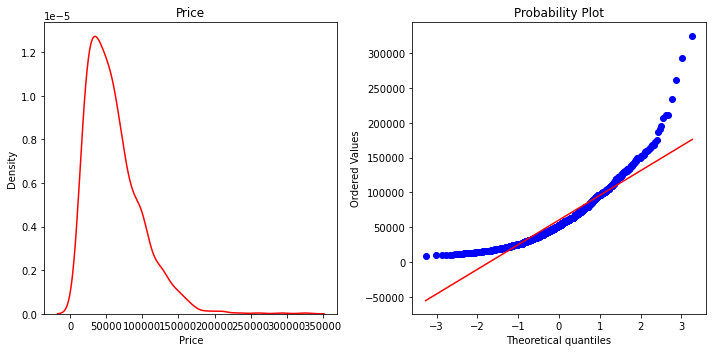

In [30]:
a=df.copy()
a['Weight']=a['Weight'].apply(lambda x:x.replace('kg',''))
a['Weight']=a['Weight'].astype('float64')

# Distribution of numerical features

for fea in ['Inches','Weight','Price']:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.title(fea)
    sns.kdeplot(data=a,x=fea,color='red')
    plt.tight_layout()
    plt.subplot(122)
    plt.title('Q_Q_plot-'+fea)
    stats.probplot(a[fea],dist='norm',plot=plt)
    plt.tight_layout()


In [31]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [36]:
c=df.groupby('Company')['Price'].mean().sort_values(ascending=False).reset_index()
c

,Company,Price
0,Razer,178282.491429
1,LG,111834.720000
2,MSI,92116.226133
3,Google,89386.080000
4,Microsoft,85903.788000
5,Apple,83340.499886
6,Huawei,75870.720000
7,Samsung,75308.320000
8,Toshiba,67549.050000
9,Dell,63894.714408


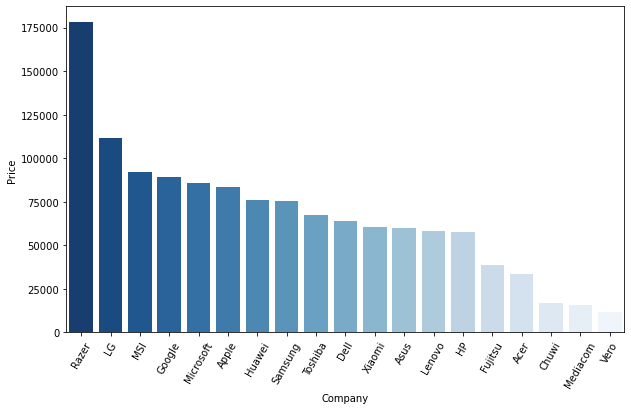

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(data=c,x='Company',y='Price',palette=sns.color_palette('Blues_r',c.shape[0]))
plt.xticks(rotation=60);

1. Razer is the most expensive Laptop in the dataset
2. MSI,Apple,Google,Microsoft lies almost in the same price range in the dataset
(The price in reality depend on various factors- but the import take away from this visualization is that there is relationship
between laptob price and brand)

In [50]:
c=df.groupby('TypeName')['Price'].mean().sort_values(ascending=False).reset_index()
c

,TypeName,Price
0,Workstation,121497.525683
1,Gaming,92247.960187
2,Ultrabook,82939.698928
3,2 in 1 Convertible,68715.990154
4,Notebook,42055.998976
5,Netbook,35877.825391


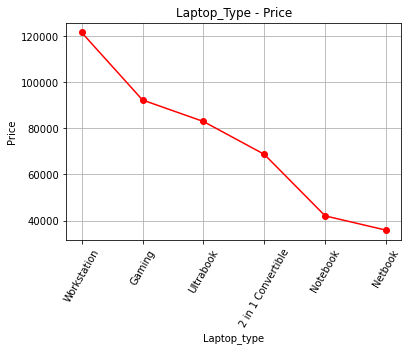

In [59]:
plt.plot(c['TypeName'],c['Price'],marker='o',color='red')
plt.title('Laptop_Type - Price')
plt.xlabel('Laptop_type')
plt.ylabel('Price')
plt.xticks(rotation=60);
plt.grid()

1. Price of the laptop depends on the Laptop Type
2. Most expensive laptops belongs to the type Workstation followed by Gaming and Ultrabook

In [60]:
# Before making any further anlysis Need to modify features in the dataset

#### Modifying Screenresolution feature

In [69]:
#From the Countplot visualtion of screenresolution it is clear that most of the resolution belongs to "['Full HD 1920x1080',IPS Panel Full HD 1920x1080,1366x768]"
# So less frequent resolutions in the dataset can be combined as it will not effect much on price predictions

In [563]:
a=df.copy()

In [564]:
f=a['ScreenResolution'].value_counts(normalize=True)*100      # percentage representation of counts
m=a['ScreenResolution'].map(f)                                # fetch percentage info to  new series data
a['ScreenResolution']=a['ScreenResolution'].mask(m<1,'less')  # change less frequent class to a label 'less'

In [565]:
ind=a.ScreenResolution.value_counts().index
val=a.ScreenResolution.value_counts().values

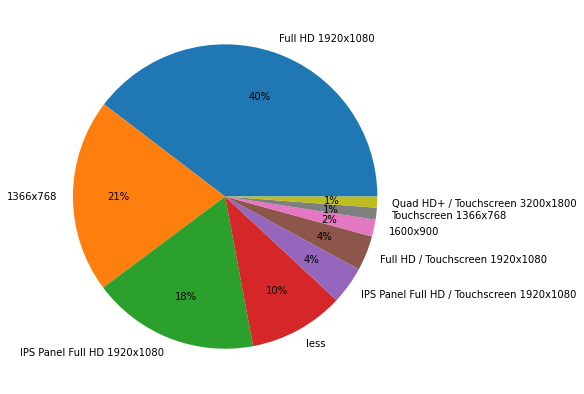

In [566]:
plt.figure(figsize=(7,7))
plt.pie(x=val,labels=ind,autopct='%1.0f%%',pctdistance=0.7);

In [567]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


##### Modifying Cpu feature

In [568]:
# functions to extract Manufacturer,Processor,frequency and creating new features

def core(x):
    import re
    a=re.findall('i\d{1}',x)
    if len(a)!=0:
        return a[0]
    else:
        return 'other'

def freq(x):
    import re
    a=re.findall('\d\.\d+',x)
    if len(a)!=0:
        return a[0]
    else:
        return 0
    
def pro_b(x):
    import re
    a=re.findall('I\S+l',x)
    if len(a)!=0:
        return a[0]
    else:
        return 'other'

In [569]:
a['Core']=a['Cpu'].apply(core)
a['freq']=a['Cpu'].apply(freq)
a['proc_b']=a['Cpu'].apply(pro_b)

In [570]:
a.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Core,freq,proc_b
0,Apple,Ultrabook,13.3,less,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,i5,2.3,Intel
1,Apple,Ultrabook,13.3,less,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,i5,1.8,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,i5,2.5,Intel


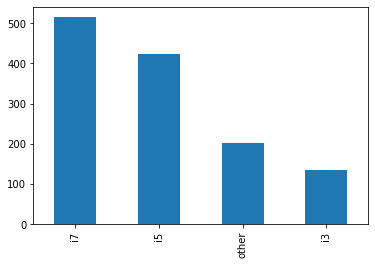

In [571]:
a.Core.value_counts().plot(kind='bar');

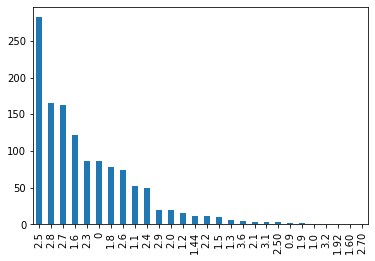

In [572]:
a.freq.value_counts().plot(kind='bar');

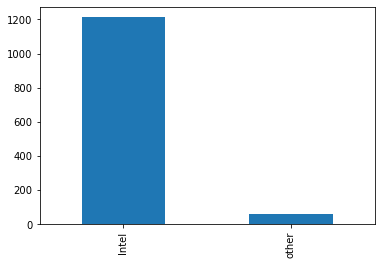

In [573]:
a.proc_b.value_counts().plot(kind='bar');

1. We can see from the above plots that "Proc_b" feature is skewed to the value "Intel".So this feature can be removed as it will have only
less impact on predicting prices

#### Modifying Ram Feature

In [574]:
a['Ram']=a['Ram'].apply(lambda x:x.replace('GB',''))
a['Ram']=a['Ram'].astype('float64')

In [575]:
a.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Core,freq,proc_b
0,Apple,Ultrabook,13.3,less,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,i5,2.3,Intel
1,Apple,Ultrabook,13.3,less,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,i5,1.8,Intel


#### Modifying Memory feature

In [576]:
# There are four kinds of storages in Memory SSD,HDD,Flash Storage and Hybrid.These info can be extracted from Memory feature

# Functions to extract memory info

def extract_ssd(x):
    a=x.split('+')
    for i in a:
        if 'SSD' in i:
            y=i.strip().replace('TB','')
            z=y.replace('GB','')
            m=z.replace('SSD','')
            c=int(m.strip())
            if c==1:
                c=1000
            return c
        
def extract_hdd(x):
    a=x.split('+')
    
    for i in a:
        if 'HDD' in i:
            y=i.strip().replace('TB','')
            z=y.replace('GB','')
            m=z.replace('HDD','')
            c=int(float((m.strip())))
            if c==1:
                c=1000
            return c
        
def extract_flash(x):
    a=x.split('+')
    
    for i in a:
        if 'Flash Storage' in i:
            y=i.strip().replace('TB','')
            z=y.replace('GB','')
            m=z.replace('Flash Storage','')
            c=int(float((m.strip())))
            if c==1:
                c=1000
            return c
        
def extract_hybrid(x):
    a=x.split('+')
    for i in a:
        if 'Hybrid' in i:
            y=i.strip().replace('TB','')
            z=y.replace('GB','')
            m=z.replace('Hybrid','')
            c=int(float((m.strip())))
            if c==1:
                c=1000
            return c

In [577]:
a['SSD']=a['Memory'].apply(extract_ssd)
a['HDD']=a['Memory'].apply(extract_hdd)
a['Flash']=a['Memory'].apply(extract_flash)
a['hybrid']=a['Memory'].apply(extract_hybrid)

In [578]:
a.fillna(0,inplace=True)

In [579]:
a.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Core,freq,proc_b,SSD,HDD,Flash,hybrid
0,Apple,Ultrabook,13.3,less,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,i5,2.3,Intel,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,13.3,less,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,i5,1.8,Intel,0.0,0.0,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,i5,2.5,Intel,256.0,0.0,0.0,0.0


<AxesSubplot:>

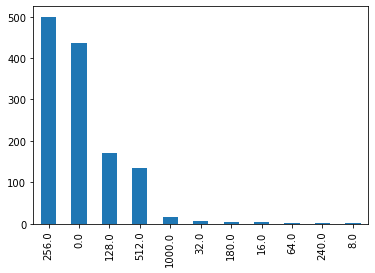

In [580]:
a.SSD.value_counts().plot(kind='bar')

<AxesSubplot:>

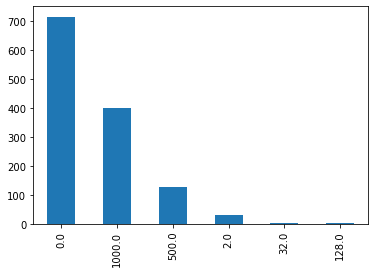

In [581]:
a.HDD.value_counts().plot(kind='bar')

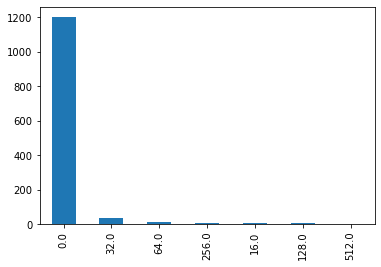

In [582]:
a.Flash.value_counts().plot(kind='bar');

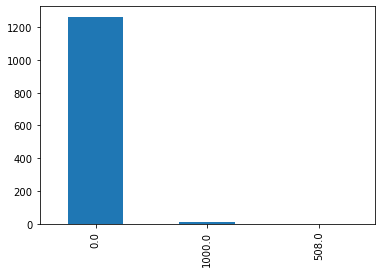

In [583]:
a.hybrid.value_counts().plot(kind='bar');

#### Modifying GPU feature

In [584]:
a['Gpu']=a['Gpu'].apply(lambda x:x.split()[0])

In [585]:
a.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Core,freq,proc_b,SSD,HDD,Flash,hybrid
0,Apple,Ultrabook,13.3,less,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel,macOS,1.37kg,71378.6832,i5,2.3,Intel,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,13.3,less,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel,macOS,1.34kg,47895.5232,i5,1.8,Intel,0.0,0.0,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel,No OS,1.86kg,30636.0000,i5,2.5,Intel,256.0,0.0,0.0,0.0


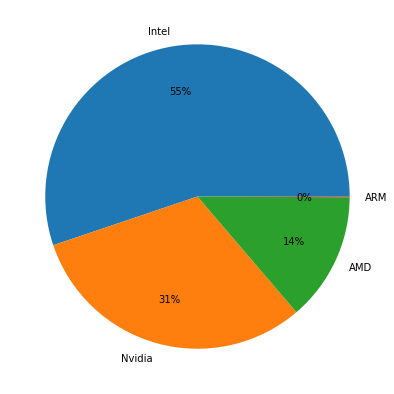

In [586]:
val=a.Gpu.value_counts().values
ind=a.Gpu.value_counts().index
plt.figure(figsize=(7,7))
plt.pie(x=val,labels=ind,autopct='%1.0f%%',pctdistance=0.7);

#### Modifying operating Sysytem feature

In [587]:
def os_rep(x):
    import re
    if re.search('w.*',x.lower()):
        return 'windows'
    elif re.search('mac.*',x.lower()):
        return 'mac'
    elif re.search('chr.*',x.lower()):
        return 'chrome'
    elif re.search('lin.*',x.lower()):
        return 'linux'
    else:
        return 'other'

In [588]:
a['OpSys']=a['OpSys'].apply(os_rep)

<AxesSubplot:>

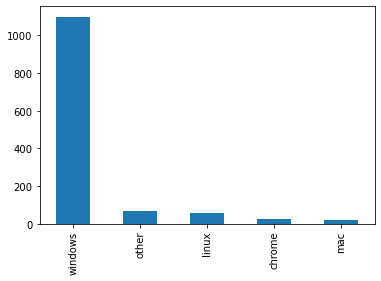

In [589]:
a.OpSys.value_counts().plot(kind='bar')

#### Modifying Weight feature

In [590]:
a['Weight']=a['Weight'].apply(lambda x:x.replace('kg',''))
a['Weight']=a['Weight'].astype('float64')

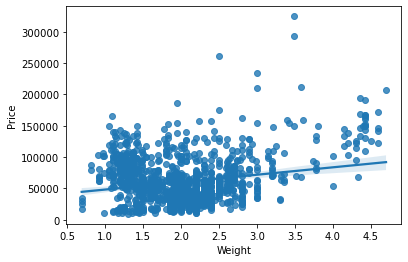

In [591]:
sns.regplot(data=a,x='Weight',y='Price');

In [592]:
a.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Core,freq,proc_b,SSD,HDD,Flash,hybrid
0,Apple,Ultrabook,13.3,less,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel,mac,1.37,71378.6832,i5,2.3,Intel,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,13.3,less,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel,mac,1.34,47895.5232,i5,1.8,Intel,0.0,0.0,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel,other,1.86,30636.0000,i5,2.5,Intel,256.0,0.0,0.0,0.0


In [593]:
#Cpu,Memory,--Removing unwanted features-- useful info has been extracted from these features
#proc_b,hybrid,- hybrid-contains mostly zeros-can be removed

a.drop(['Cpu','Memory','hybrid'],axis=1,inplace=True)

In [594]:
#a.drop(['Weight'],axis=1,inplace=True)

In [602]:
a.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Core,freq,proc_b,SSD,HDD,Flash
0,Apple,Ultrabook,13.3,less,8.0,Intel,mac,1.37,71378.6832,i5,2.3,Intel,128.0,0.0,0.0
1,Apple,Ultrabook,13.3,less,8.0,Intel,mac,1.34,47895.5232,i5,1.8,Intel,0.0,0.0,128.0
2,HP,Notebook,15.6,Full HD 1920x1080,8.0,Intel,other,1.86,30636.0000,i5,2.5,Intel,256.0,0.0,0.0
3,Apple,Ultrabook,15.4,less,16.0,AMD,mac,1.83,135195.3360,i7,2.7,Intel,512.0,0.0,0.0
4,Apple,Ultrabook,13.3,less,8.0,Intel,mac,1.37,96095.8080,i5,3.1,Intel,256.0,0.0,0.0


In [628]:
x=a.drop(['Price'],axis=1)
y=a.iloc[:,8]

In [629]:
x.head(3)

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Core,freq,proc_b,SSD,HDD,Flash
0,Apple,Ultrabook,13.3,less,8.0,Intel,mac,1.37,i5,2.3,Intel,128.0,0.0,0.0
1,Apple,Ultrabook,13.3,less,8.0,Intel,mac,1.34,i5,1.8,Intel,0.0,0.0,128.0
2,HP,Notebook,15.6,Full HD 1920x1080,8.0,Intel,other,1.86,i5,2.5,Intel,256.0,0.0,0.0


In [630]:
y.head(3)

0    71378.6832
1    47895.5232
2    30636.0000
Name: Price, dtype: float64

#### Feature Encoding and Standardisation

In [631]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [632]:
#[0,1,3,5,6]        -->Onehot encoding
#[8]                -->ordinal encoding
#[2,4,7,9,10,11,12] -->Standardscaler--

#['i5', 'i7', 'other', 'i3']

In [633]:
# col_trans=ColumnTransformer(transformers=[
#     ('ohe',OneHotEncoder(drop='first'),[0,1,3,5,6]),
#     ('oe',OrdinalEncoder(categories=[['other','i3','i5','i7']]),['Core']),
#     ('se',StandardScaler(),[2,4,8,9,10,11])
# ],remainder='passthrough')

In [634]:
# col_trans=ColumnTransformer(transformers=[
#     ('ohe',OneHotEncoder(drop='first',sparse_output=False),[0,1,3,5,6]),
#     ('oe',OrdinalEncoder(categories=[['other','i3','i5','i7']]),['Core']),
#     ('se',StandardScaler(),[2,4,7,9,10,11,12])
# ],remainder='passthrough')

In [635]:
col_trans=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first',sparse_output=False),[0,1,3,5,6,10]),
    ('oe',OrdinalEncoder(categories=[['other','i3','i5','i7']]),['Core']),
    ('se',StandardScaler(),[2,4,7,9,11,12,13])
],remainder='passthrough')

In [636]:
x=col_trans.fit_transform(x)

In [608]:
x.shape

(1274, 47)

In [609]:
x

array([[ 1.        ,  0.        ,  0.        , ..., -0.30987794,
        -0.80038871, -0.14788174],
       [ 1.        ,  0.        ,  0.        , ..., -1.00450067,
        -0.80038871,  4.0504767 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.3847448 ,
        -0.80038871, -0.14788174],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.77399027,
        -0.80038871, -0.14788174],
       [ 0.        ,  0.        ,  0.        , ..., -1.00450067,
        -0.80038871,  1.95129748],
       [ 0.        ,  0.        ,  0.        , ..., -1.00450067,
         1.39854776, -0.14788174]])

In [637]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [638]:
x_train.shape

(891, 47)

In [639]:
x_test.shape

(383, 47)

### LinearRegression,Lasso,Ridge

In [613]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_percentage_error

In [346]:
model_lr=LinearRegression()
model_la=Lasso(alpha=2,max_iter=1500)
model_r=Ridge(alpha=0.01,max_iter=1500)

In [347]:
model_lr.fit(x_train,y_train)
model_la.fit(x_train,y_train)
model_r.fit(x_train,y_train)

Ridge(alpha=0.01, max_iter=1500)

In [348]:
y_pred_lr=model_lr.predict(x_test)
y_pred_la=model_la.predict(x_test)
y_pred_r=model_r.predict(x_test)

In [485]:
print('r2_score for LinearRegression:{}'.format(r2_score(y_test,y_pred_lr)))
print('r2_score for LassoRegression:{}'.format(r2_score(y_test,y_pred_la)))
print('r2_score for RidgeRegression:{}'.format(r2_score(y_test,y_pred_r)))

r2_score for LinearRegression:0.7550174387302333
r2_score for LassoRegression:0.7560445632227678
r2_score for RidgeRegression:0.7553077898096037


### DecisionTreeRegressor

In [438]:
from sklearn.tree import DecisionTreeRegressor


In [479]:
model_dec=DecisionTreeRegressor(criterion='squared_error',max_depth=30,splitter='best',min_samples_split=10) 

In [480]:
model_dec.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=30, min_samples_split=10)

In [481]:
y_pred_dec=model_dec.predict(x_test)

In [486]:
print('r2_score for DecisiontreeRegressor:{}'.format(r2_score(y_test,y_pred_dec)))

r2_score for DecisiontreeRegressor:0.6707798555509963


### RandomForestRegressor

In [441]:
from sklearn.ensemble import RandomForestRegressor

In [537]:
model_ran=RandomForestRegressor(n_estimators=150,max_features=20,max_samples=700,max_depth=18,min_samples_split=6)

In [538]:
model_ran.fit(x_train,y_train)

RandomForestRegressor(max_depth=18, max_features=20, max_samples=700,
                      min_samples_split=6, n_estimators=150)

In [539]:
y_pred_ran=model_ran.predict(x_test)

In [542]:
print('r2_score for RandomForestRegressor:{}'.format(r2_score(y_test,y_pred_ran)))

r2_score for RandomForestRegressor:0.8149578016295702


### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [556]:
model_knn=KNeighborsRegressor(n_neighbors=5)

In [557]:
model_knn.fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)

r2_score for KNNRegression:0.7507660760920428


### R2 Score for all models

In [561]:
print('r2_score for LinearRegression:{}'.format(r2_score(y_test,y_pred_lr)))
print('r2_score for LassoRegression:{}'.format(r2_score(y_test,y_pred_la)))
print('r2_score for RidgeRegression:{}'.format(r2_score(y_test,y_pred_r)))
print('r2_score for KNNRegression:{}'.format(r2_score(y_test,y_pred)))
print('r2_score for DecisiontreeRegressor:{}'.format(r2_score(y_test,y_pred_dec)))
print('r2_score for DecisiontreeRegressor:{}'.format(r2_score(y_test,y_pred_ran)))

r2_score for LinearRegression:0.7550174387302333
r2_score for LassoRegression:0.7560445632227678
r2_score for RidgeRegression:0.7553077898096037
r2_score for KNNRegression:0.7507660760920428
r2_score for DecisiontreeRegressor:0.6707798555509963
r2_score for DecisiontreeRegressor:0.8149578016295702
